In [1]:
!ls 

bulldozer_dl.ipynb	      lesson1-rf.ipynb
bulldozer_linreg.ipynb	      lesson2-rf_interpretation.ipynb
Ethics in Data Science.ipynb  lesson3-rf_foundations.ipynb
excel			      lesson4-mnist_sgd.ipynb
fastai			      lesson5-nlp.ipynb
images			      ppt
Lesson1 Random Forrest.ipynb


In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [16]:
!ls ./data/bulldozers

Test.csv	   TrainAndValid.zip  Train.zip  Valid.zip
TrainAndValid.csv  Train.csv	      Valid.csv


In [17]:
PATH = "./data/bulldozers/"
!ls {PATH}

Test.csv	   TrainAndValid.zip  Train.zip  Valid.zip
TrainAndValid.csv  Train.csv	      Valid.csv


In [18]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=["saledate"])

In [20]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_rows', 1000):
            display(df)

In [22]:
display_all(df_raw.head().transpose())

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [23]:
display_all(df_raw.describe(include='all').transpose())

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

## Data Processing

In [25]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Conventional'

In [26]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [28]:
train_cats(df_raw) # turn categories to numbers

In [29]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [30]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [31]:
len(df_raw.index)

401125

In [33]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

AttributeError: Can only use .cat accessor with a 'category' dtype

In [34]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [35]:
df_raw.UsageBand.head()

0    1
1    1
2    0
3    0
4    2
Name: UsageBand, dtype: int8

In [36]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [37]:
os.makedirs('tmp', exist_ok=True)

In [38]:
df_raw.to_feather('tmp/bulldozers-raw')

## Preprocessing

In [39]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [43]:
df, y, nas = proc_df(df_raw, 'SalePrice')
#nas: returns a dictionary of which nas it created, and the associated median.
print(nas)

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}


In [44]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

0.98313832411867719

score is R2: 0: bad, like taking mean, 1: good, all on point. 

In [55]:
# take first n and make 2 copies
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

In [56]:
n_valid = 12000 # same as kaggle test size
n_trn = len(df) - n_valid

In [57]:
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

Train and validation are the same for now. 

## Random forrests

### base model

In [58]:
def rmse(x, y): return math.sqrt(((x-y)**2).mean())

In [59]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), 
          rmse(m.predict(X_valid), y_valid), 
          m.score(X_train, y_train), 
          m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [60]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 19s, sys: 268 ms, total: 1min 19s
Wall time: 16 s
[0.09050597319689505, 0.2505236293038778, 0.98288056957277481, 0.88791555046317883]


## Speed things up

In [62]:
proc_df

<function fastai.structured.proc_df>

In [63]:
#na_dict: a dictionary of na columns to add. Na columns are also added if thereare any missing values.
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', 
                             subset=30000,
                             na_dict=nas)

In [67]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 17s, sys: 292 ms, total: 1min 17s
Wall time: 15.4 s
[0.09033820810802885, 0.249386604569184, 0.98294397712048287, 0.88893065300168728]


In [68]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5371269683343529, 0.5674541015387154, 0.39703966649954642, 0.42494490873721891]


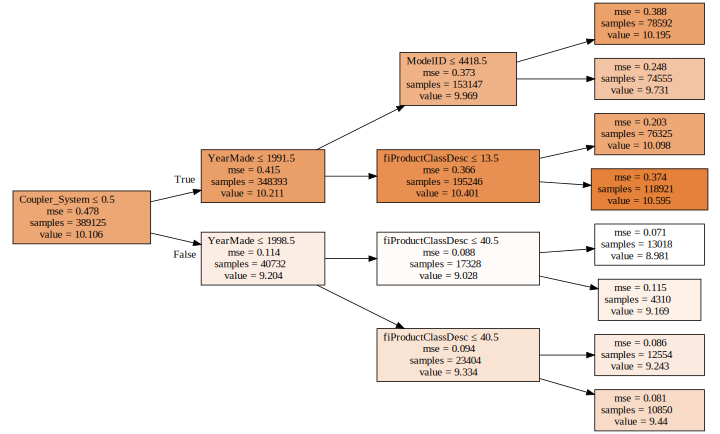

In [70]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [71]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[1.0870489658834628e-06, 0.343479166453984, 0.9999999999975302, 0.7893076464002563]


In [ ]:
plt.plot([metrics])

## bagging

In [73]:
m = RandomForestRegressor(n_jobs=-1)

In [74]:
m.fit(X_train, y_train)
print_score(m)

[0.09042129497426549, 0.24582983901180372, 0.98291258878079324, 0.89207621515403246]


In [77]:
print(len(m.estimators_))
print(m.max_depth)

10
None


In [81]:
preds = np.stack([
    t.predict(X_valid) for t in m.estimators_
])
preds[:,0], np.mean(preds[:, 0]), y_valid[0]

(array([ 8.9872 ,  9.04782,  9.01189,  9.10498,  9.25913,  9.21034,  8.95545,  9.21034,  9.12696,  8.9359 ]),
 9.0850009244468026,
 9.1049798563183568)

The more trees you have, the better the result, but only up to a point

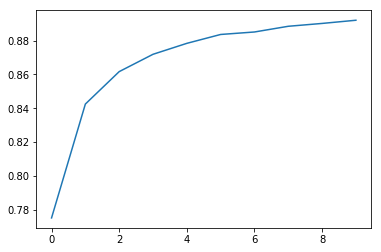

In [82]:
plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)
])

In [83]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)


[0.08263111942034485, 0.2401985735245822, 0.98573006159150622, 0.89696404000327679]


In [84]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.07836757668316309, 0.23814210125407245, 0.98716465161237343, 0.89872078264721655]


## Out of bag (OOB) score

In [86]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07833938774511816, 0.23654159747315942, 0.9871738837408407, 0.90007756128203686, 0.90823663634259921]


## Reduce overfitting: subsampling etc. 

In [89]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [90]:
set_rf_samples(20000)

In [91]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 8.65 s, sys: 388 ms, total: 9.04 s
Wall time: 4.18 s
[0.2397577640389782, 0.2751283462082498, 0.87986205868180645, 0.8648180679262909, 0.86739134870932444]


In [92]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2271782869423351, 0.2619003432799112, 0.89213800048405445, 0.87750450716730843, 0.88057786525547088]


# Tree building parameters

In [93]:
reset_rf_samples()

In [94]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)

In [95]:
m.fit(X_train, y_train)
print_score(m)

[0.07826768146415192, 0.23648123038856195, 0.98719735321648516, 0.90012855659675406, 0.90861341396012085]
